In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Composition and Entropy

In [27]:
#Read Composition files from Rüdiger
#df=pd.read_csv("input_data/donor_composition.csv")
df=pd.read_csv("input_data/remnant_composition.csv")

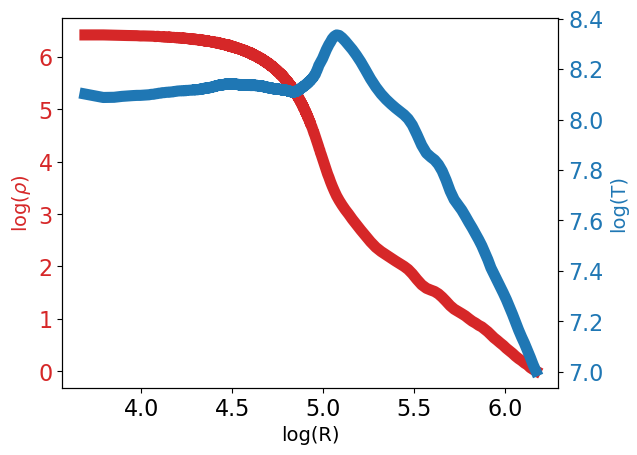

In [28]:
color = 'tab:red'
fig, ax1 = plt.subplots()
plt.rcParams["lines.linewidth"]=8
plt.rcParams["font.size"]=16
ax1.set_xlabel('log(R)')
ax1.set_ylabel(r'log($\rho$)', color=color)
ax1.plot(np.log10(df["r_outer,"]*10e-5), np.log10(df["density,"]), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('log(T)', color=color)  # we already handled the x-label with ax1
ax2.plot(np.log10(df["r_outer,"]*10e-5), np.log10(df["T,"]), color=color)
ax2.tick_params(axis='y', labelcolor=color)

In [8]:
df["xn_ti44,"]#.max()

0      4.400000e-29
1      4.400000e-29
2      4.400000e-29
3      4.400000e-29
4      4.400000e-29
           ...     
995    1.678189e-05
996    1.687517e-05
997    1.695768e-05
998    1.710698e-05
999    1.706533e-05
Name: xn_ti44,, Length: 1000, dtype: float64

In [4]:
columns_to_keep = ['mass,','embedded_mass','r_outer,', 'xn_p,','xn_he3,', 'xn_he4,','xn_c12,','xn_n14,','xn_o16,','xn_o18,','xn_ne20,','xn_ne22,','xn_mg24,',
                   'xn_si28,','xn_ca40,','xn_ti44,','xn_ni56,','density,','T,']
df=df[columns_to_keep]
df2=df.columns[3:17]
print(df2)
df[df2]= df[df2].div(df[df2].sum(axis=1), axis=0) #Since originally we had more elements we need to renomarlize
print(df)

Index(['xn_p,', 'xn_he3,', 'xn_he4,', 'xn_c12,', 'xn_n14,', 'xn_o16,',
       'xn_o18,', 'xn_ne20,', 'xn_ne22,', 'xn_mg24,', 'xn_si28,', 'xn_ca40,',
       'xn_ti44,', 'xn_ni56,'],
      dtype='object')
            mass,  embedded_mass      r_outer,         xn_p,  xn_he3,  \
0    1.379065e+30   1.379065e+30  4.245878e+07  1.000000e-30      0.0   
1    1.379177e+30   2.758243e+30  5.359815e+07  1.000000e-30      0.0   
2    1.379142e+30   4.137385e+30  6.141454e+07  1.000000e-30      0.0   
3    1.379193e+30   5.516578e+30  6.766918e+07  1.000000e-30      0.0   
4    1.379257e+30   6.895834e+30  7.295333e+07  1.000000e-30      0.0   
..            ...            ...           ...           ...      ...   
995  1.379073e+30   1.373658e+33  1.761303e+09  7.678807e-18      0.0   
996  1.379146e+30   1.375037e+33  1.768150e+09  6.970498e-18      0.0   
997  1.379303e+30   1.376416e+33  1.774383e+09  6.356768e-18      0.0   
998  1.379104e+30   1.377795e+33  1.780037e+09  5.365813e-18      0

In [3]:
###Add He and O18 but make them 0 along with hydrogen
import astropy.units as u
df['xn_he3,'] = 0.0e0
df['xn_o18,'] = 0.0e0
#df['xn_p,'] = 0.0e0
#df['xn_he4,'] = 10*df['xn_he4,'] 
#df['xn_fe56,'] = 0.0e0
#df['xn_co56,'] = 0.0e0

df["embedded_mass"]=df["mass,"].cumsum()
he_mass=(df["mass,"]*df["xn_he4,"]).sum()*u.g/u.M_sun
print(he_mass.cgs)

0.024735624262667913


In [5]:
gravity=df["embedded_mass"]/df["r_outer,"]
print(gravity)
from astropy.constants import G,m_p
gravity=G.cgs.value*gravity
nickel=5.38*df["xn_ni56,"]*(1.6e-6)/(56*m_p.cgs.value) #5.38 MeV from Ni56 to Iron
print(nickel)


0      2.669837e+22
1      4.238349e+22
2      5.545770e+22
3      6.706621e+22
4      7.773405e+22
           ...     
995    1.026921e+23
996    9.913206e+22
997    9.565601e+22
998    9.239549e+22
999    8.937433e+22
Length: 1000, dtype: float64
0      5.146411e-12
1      5.146411e-12
2      5.146411e-12
3      5.146411e-12
4      5.146411e-12
           ...     
995    7.201441e+16
996    7.203046e+16
997    7.206249e+16
998    7.157103e+16
999    7.133382e+16
Name: xn_ni56,, Length: 1000, dtype: float64


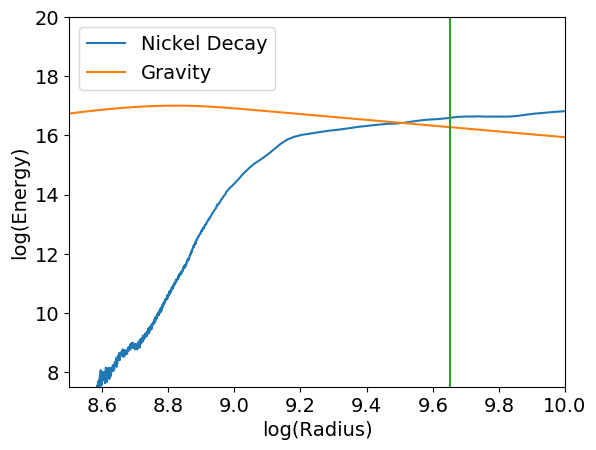

In [36]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
plt.plot(np.log10(df["r_outer,"]),np.log10((nickel)))
plt.plot(np.log10(df["r_outer,"]),np.log10(gravity))
plt.ylim(7.5,20)
plt.xlim(8.5,10)
plt.xlabel("log(Radius)")
plt.ylabel("log(Energy)")
plt.legend(["Nickel Decay","Gravity"])
plt.plot((np.log10(df["r_outer,"][(nickel/gravity)>2].iloc[0]),
          np.log10(df["r_outer,"][(nickel/gravity)>2].iloc[0])),(0,20))
#plt.plot((0.5,0.7),(-3,-3))


In [34]:
diff=np.abs((-nickel/gravity)+2).argmin()
print(diff)
df = df.drop(df.index[diff:])
print(df)

970
            mass,  embedded_mass      r_outer,         xn_p,  xn_he3,  \
0    1.312658e+30   1.312658e+30  4.916621e+07  1.000000e-30      0.0   
1    1.312686e+30   2.625344e+30  6.194260e+07  1.000000e-30      0.0   
2    1.312821e+30   3.938165e+30  7.101204e+07  1.000000e-30      0.0   
3    1.312681e+30   5.250846e+30  7.829346e+07  1.000000e-30      0.0   
4    1.312702e+30   6.563547e+30  8.443594e+07  1.000000e-30      0.0   
..            ...            ...           ...           ...      ...   
965  1.312778e+30   1.268097e+33  3.471213e+09  2.128490e-04      0.0   
966  1.312738e+30   1.269409e+33  3.684076e+09  2.351329e-04      0.0   
967  1.312661e+30   1.270722e+33  3.889459e+09  2.497803e-04      0.0   
968  1.312830e+30   1.272035e+33  4.086974e+09  2.570373e-04      0.0   
969  1.312666e+30   1.273348e+33  4.285521e+09  2.709612e-04      0.0   

          xn_he4,   xn_c12,       xn_n14,   xn_o16,  xn_o18,      xn_ne20,  \
0    7.326613e-08  0.500000  1.400005e-29

/tmp/ipykernel_2322437/2960766983.py:1: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  diff=np.abs((-nickel/gravity)+2).argmin()


In [5]:
df["embedded_mass"]=(df["embedded_mass"]/df["mass,"].sum())
df["q_m"]=1.0e00-df["embedded_mass"]
df.loc[df['q_m'] < 0, 'q_m'] = 0 #Due to numerics
print(df)

            mass,  embedded_mass      r_outer,         xn_p,  xn_he3,  \
0    1.379065e+30          0.001  4.245878e+07  1.000000e-30      0.0   
1    1.379177e+30          0.002  5.359815e+07  1.000000e-30      0.0   
2    1.379142e+30          0.003  6.141454e+07  1.000000e-30      0.0   
3    1.379193e+30          0.004  6.766918e+07  1.000000e-30      0.0   
4    1.379257e+30          0.005  7.295333e+07  1.000000e-30      0.0   
..            ...            ...           ...           ...      ...   
995  1.379073e+30          0.996  1.761303e+09  7.678807e-18      0.0   
996  1.379146e+30          0.997  1.768150e+09  6.970498e-18      0.0   
997  1.379303e+30          0.998  1.774383e+09  6.356768e-18      0.0   
998  1.379104e+30          0.999  1.780037e+09  5.365813e-18      0.0   
999  1.379416e+30          1.000  1.785177e+09  5.598719e-18      0.0   

          xn_he4,   xn_c12,       xn_n14,   xn_o16,  xn_o18,      xn_ne20,  \
0    1.877212e-24  0.500000  1.400000e-29  0.

In [6]:
df["q_m"]=df["q_m"]/df["q_m"].max()
print(df)

            mass,  embedded_mass      r_outer,         xn_p,  xn_he3,  \
0    1.379065e+30          0.001  4.245878e+07  1.000000e-30      0.0   
1    1.379177e+30          0.002  5.359815e+07  1.000000e-30      0.0   
2    1.379142e+30          0.003  6.141454e+07  1.000000e-30      0.0   
3    1.379193e+30          0.004  6.766918e+07  1.000000e-30      0.0   
4    1.379257e+30          0.005  7.295333e+07  1.000000e-30      0.0   
..            ...            ...           ...           ...      ...   
995  1.379073e+30          0.996  1.761303e+09  7.678807e-18      0.0   
996  1.379146e+30          0.997  1.768150e+09  6.970498e-18      0.0   
997  1.379303e+30          0.998  1.774383e+09  6.356768e-18      0.0   
998  1.379104e+30          0.999  1.780037e+09  5.365813e-18      0.0   
999  1.379416e+30          1.000  1.785177e+09  5.598719e-18      0.0   

          xn_he4,   xn_c12,       xn_n14,   xn_o16,  xn_o18,      xn_ne20,  \
0    1.877212e-24  0.500000  1.400000e-29  0.

In [7]:
df.insert(0,"q_m",df.pop("q_m"))
df=df.loc[::-1].reset_index(drop=True) #Same for Entropy
print(df)

          q_m         mass,  embedded_mass      r_outer,         xn_p,  \
0    0.000000  1.379416e+30          1.000  1.785177e+09  5.598719e-18   
1    0.001001  1.379104e+30          0.999  1.780037e+09  5.365813e-18   
2    0.002002  1.379303e+30          0.998  1.774383e+09  6.356768e-18   
3    0.003003  1.379146e+30          0.997  1.768150e+09  6.970498e-18   
4    0.004004  1.379073e+30          0.996  1.761303e+09  7.678807e-18   
..        ...           ...            ...           ...           ...   
995  0.995996  1.379257e+30          0.005  7.295333e+07  1.000000e-30   
996  0.996997  1.379193e+30          0.004  6.766918e+07  1.000000e-30   
997  0.997998  1.379142e+30          0.003  6.141454e+07  1.000000e-30   
998  0.998999  1.379177e+30          0.002  5.359815e+07  1.000000e-30   
999  1.000000  1.379065e+30          0.001  4.245878e+07  1.000000e-30   

     xn_he3,       xn_he4,   xn_c12,       xn_n14,   xn_o16,  xn_o18,  \
0        0.0  2.553548e-01  0.372390  

In [38]:
print(df.columns)

Index(['q_m', 'mass,', 'embedded_mass', 'r_outer,', 'xn_p,', 'xn_he3,',
       'xn_he4,', 'xn_c12,', 'xn_n14,', 'xn_o16,', 'xn_o18,', 'xn_ne20,',
       'xn_ne22,', 'xn_mg24,', 'xn_si28,', 'xn_ca40,', 'xn_ti44,', 'xn_ni56,',
       'density,', 'T,'],
      dtype='object')


In [39]:
df_comp=df[['q_m','xn_p,', 'xn_he3,','xn_he4,', 'xn_c12,', 'xn_n14,', 'xn_o16,', 'xn_o18,', 'xn_ne20,',
       'xn_ne22,', 'xn_mg24,', 'xn_si28,','xn_ca40,','xn_ti44,','xn_ni56,']]

print(df_comp)


          q_m         xn_p,  xn_he3,       xn_he4,   xn_c12,       xn_n14,  \
0    0.000000  2.709612e-04      0.0  1.071547e-02  0.263460  2.956800e-07   
1    0.001032  2.570373e-04      0.0  1.047356e-02  0.271879  3.020427e-07   
2    0.002064  2.497803e-04      0.0  1.014334e-02  0.275762  3.098083e-07   
3    0.003096  2.351329e-04      0.0  9.728933e-03  0.284391  3.179566e-07   
4    0.004128  2.128490e-04      0.0  8.939832e-03  0.297319  3.434475e-07   
..        ...           ...      ...           ...       ...           ...   
965  0.995872  1.000000e-30      0.0  1.636196e-07  0.500000  1.400011e-29   
966  0.996904  1.000000e-30      0.0  1.174176e-07  0.500000  1.400008e-29   
967  0.997936  1.000000e-30      0.0  8.055901e-08  0.500000  1.400005e-29   
968  0.998968  1.000000e-30      0.0  6.945016e-08  0.500000  1.400005e-29   
969  1.000000  1.000000e-30      0.0  7.326613e-08  0.500000  1.400005e-29   

      xn_o16,  xn_o18,      xn_ne20,      xn_ne22,      xn_mg24

In [40]:

df_comp.to_csv('output_data/composition_ca40_ti44_ni56.dat', sep='\t', index=False)


In [8]:
df_ent=df[['q_m','density,','T,']]
df_ent.to_csv('output_data/donor_entropy.dat', sep='\t', index=False)


In [23]:
df=pd.read_csv("input_data/remnant_composition.csv")


In [24]:
df=df.drop(df.index[diff:])

In [25]:
df["e_m"]=df["mass,"].cumsum()/df["mass,"].sum()
df["q_m"]=1.00-df["e_m"]
df.loc[df['q_m'] < 0, 'q_m'] = 0 #Due to numerics
print(df)

         r_inner,      r_outer,         mass,      density,          l_z,  \
0    0.000000e+00  4.916621e+07  1.312658e+30  2.636712e+06 -7.622886e+13   
1    4.916621e+07  6.194260e+07  1.312686e+30  2.637520e+06 -1.342058e+14   
2    6.194260e+07  7.101204e+07  1.312821e+30  2.602525e+06 -1.817315e+14   
3    7.101204e+07  7.829346e+07  1.312681e+30  2.572158e+06 -2.224464e+14   
4    7.829346e+07  8.443594e+07  1.312702e+30  2.567640e+06 -2.686121e+14   
..            ...           ...           ...           ...           ...   
965  3.265333e+09  3.471213e+09  1.312778e+30  4.471145e+01 -7.817824e+16   
966  3.471213e+09  3.684076e+09  1.312738e+30  3.833051e+01 -7.497450e+16   
967  3.684076e+09  3.889459e+09  1.312661e+30  3.545976e+01 -7.058492e+16   
968  3.889459e+09  4.086974e+09  1.312830e+30  3.324694e+01 -6.654731e+16   
969  4.086974e+09  4.285521e+09  1.312666e+30  3.001581e+01 -5.991902e+16   

           v_r,            u,            p,           T,         xn_n,  ...

In [28]:
columns_to_keep_2=["q_m","density,","T,"]
df=df[columns_to_keep_2]
df=df.loc[::-1].reset_index(drop=True) #Same for Entropy


In [30]:
df["q_m"]=df["q_m"]/df["q_m"].max()
print(df)

          q_m      density,           T,
0    0.000000  3.001581e+01   66336699.0
1    0.001032  3.324694e+01   69108112.0
2    0.002064  3.545976e+01   71035305.0
3    0.003096  3.833051e+01   73588359.0
4    0.004128  4.471145e+01   79078293.0
..        ...           ...          ...
965  0.995872  2.567640e+06  124034580.0
966  0.996904  2.572158e+06  123486650.0
967  0.997936  2.602525e+06  122474830.0
968  0.998968  2.637520e+06  122283220.0
969  1.000000  2.636712e+06  126202040.0

[970 rows x 3 columns]


In [31]:
df.to_csv('output_data/entropy.dat', sep='\t', index=False)


# Plotting

In [21]:
columns_to_plot = [ 'xn_n,', 'xn_p,', 'xn_he4,', 'xn_b11,', 'xn_c12,', 'xn_c13,',
       'xn_n13,', 'xn_n14,', 'xn_n15,', 'xn_o15,', 'xn_o16,', 'xn_o17,',
       'xn_f18,', 'xn_ne19,', 'xn_ne20,', 'xn_ne21,', 'xn_ne22,', 'xn_na22,',
       'xn_na23,', 'xn_mg23,', 'xn_mg24,', 'xn_mg25,', 'xn_mg26,', 'xn_al25,',
       'xn_al26,', 'xn_al27,', 'xn_si28,', 'xn_si29,', 'xn_si30,', 'xn_p29,',
       'xn_p30,', 'xn_p31,', 'xn_s31,', 'xn_s32,', 'xn_s33,', 'xn_cl33,',
       'xn_cl34,', 'xn_cl35,', 'xn_ar36,', 'xn_ar37,', 'xn_ar38,', 'xn_ar39,',
       'xn_k39,', 'xn_ca40,', 'xn_sc43,', 'xn_ti44,', 'xn_v47,', 'xn_cr48,',
       'xn_mn51,', 'xn_fe52,', 'xn_fe54,', 'xn_co55,', 'xn_ni56,', 'xn_ni58,',
       'xn_ni59'
       
       ]


In [8]:
print(df.columns)
print(len(df.columns))

Index(['r_inner,', 'r_outer,', 'mass,', 'density,', 'l_z,', 'v_r,', 'u,', 'p,',
       'T,', 'xn_n,', 'xn_p,', 'xn_he4,', 'xn_b11,', 'xn_c12,', 'xn_c13,',
       'xn_n13,', 'xn_n14,', 'xn_n15,', 'xn_o15,', 'xn_o16,', 'xn_o17,',
       'xn_f18,', 'xn_ne19,', 'xn_ne20,', 'xn_ne21,', 'xn_ne22,', 'xn_na22,',
       'xn_na23,', 'xn_mg23,', 'xn_mg24,', 'xn_mg25,', 'xn_mg26,', 'xn_al25,',
       'xn_al26,', 'xn_al27,', 'xn_si28,', 'xn_si29,', 'xn_si30,', 'xn_p29,',
       'xn_p30,', 'xn_p31,', 'xn_s31,', 'xn_s32,', 'xn_s33,', 'xn_cl33,',
       'xn_cl34,', 'xn_cl35,', 'xn_ar36,', 'xn_ar37,', 'xn_ar38,', 'xn_ar39,',
       'xn_k39,', 'xn_ca40,', 'xn_sc43,', 'xn_ti44,', 'xn_v47,', 'xn_cr48,',
       'xn_mn51,', 'xn_fe52,', 'xn_fe54,', 'xn_co55,', 'xn_ni56,', 'xn_ni58,',
       'xn_ni59'],
      dtype='object')
64


Text(0, 0.5, 'log(Xn)')

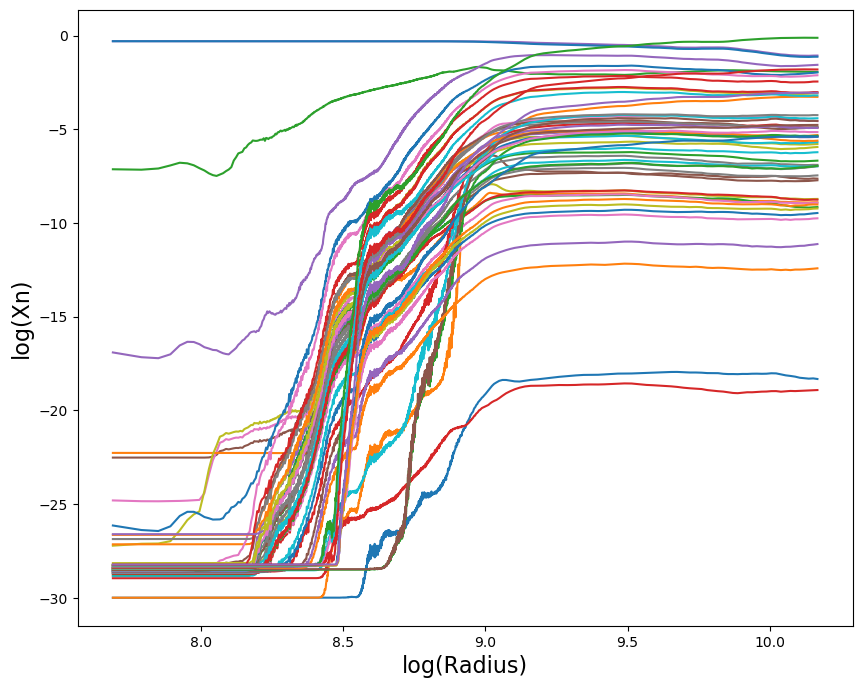

In [24]:
import matplotlib.pyplot as plt
import numpy as np
num_columns = len(df[columns_to_plot].columns[:-1])  # Exclude the X-axis column
#print(num_columns)
plt.figure(figsize=(10, 8))
for i, column in enumerate(df[columns_to_plot].columns[:]):
    if max(df[column])>1.0e-25:
        plt.plot(np.log10(df["r_outer,"]), np.log10(df[column]), label=column)
    
plt.xlabel("log(Radius)",fontsize=16)
plt.ylabel("log(Xn)",fontsize=16)
#plt.legend(loc='best', bbox_to_anchor=(1, 0.5),fontsize='large')
#plt.ylim(-8,0)